# Churn Case Study

##### Submission By:
- Vishal Shyam Khialani
- Raghavendra Galagali


<strong>Business Objectives:</strong><br/>
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. We need to do this for prepaid and high value customers only.

## Checkpoint 1: Data Understanding and Exploration

In [1]:
# Need to supress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Central place to import all libraries 
import numpy as np
import pandas as pd


# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for creating models
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# another tool for creating models
import sklearn

# for scaling the independent variables
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


# required by the project guidelines to calculate the r2_score
from sklearn.metrics import r2_score

# used to build the linear model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# RFE ( Recurisve Feature Elmination) tool 
# is used to find the most influencial features in a dataset
from sklearn.feature_selection import RFE

# this tool helps to split the original data frame to train and test dataframes
from sklearn.model_selection import train_test_split


# for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [3]:
# as the dataframe can have alot of columns we are setting the max to 140 
pd.set_option('display.max_columns', 140)

- Load Data
- check size , info and describe


In [4]:
# load the dataset using read_csv into churn_data
churn_data = pd.read_csv("telecom_churn_data.csv")


In [5]:
# shape of the dataset
churn_data.shape

(99999, 226)

In [6]:
# display 1st five rows of the dataset
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,...,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,...,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,...,0,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.0,...,0,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,Na

------------------

### List of Helper Functions

In [7]:
# function to display the null values based on given percentage
def checkNullValues(df, percentage):
    NA_features = round(100*(df.isnull().sum()/len(df.index))).sort_values(ascending=False)
    return NA_features.loc[NA_features > percentage]

In [8]:
# function to plot graphs based on "churn"
def chartChurnMou(featList,type_call):
    fig, ax = plt.subplots(figsize=(5,3))
    data=churn_data_hvc.groupby(['churn'])[featList].mean().T
    plt.plot(data)
    ax.set_xticklabels(['Jun','Jul','Aug'])
    # legend
    plt.legend(['No-Churn', 'Churn'])
    # title & labels
    plt.title("Average "+type_call+" MOU in each Month", loc='center', fontsize=12)
    plt.xlabel("Month")
    plt.ylabel("Average "+type_call+" MOU")

In [9]:
def print_score(model,test,pred):
    print("Accuracy score using "+model+": ")
    print(round(100*accuracy_score(test,pred),2))
    print("\n")
    print(classification_report(test,pred))
    print(confusion_matrix(test,pred))
#     print('Precision score value: {}'.format(precision_score(test, pred)))

In [10]:
# using community label for showing labels on plots 
# ref from https://stackoverflow.com/a/48372659 
# we made a few changes to it to suit our needs
def displayMarkers(plotVariable, d=None):
    plt.margins (0.4, 0.4)
    sections = plotVariable.patches
    i = 0
    locs, markers = plt.xticks() 
    data_dict = {}
    if not d is None:
        for key, value in d.items():
            data_dict[str(key)] = value

      # iterate through sections & add markers for bars
    for section in sections:
        # Get the height on y-axis & width on x-axis for the plots 
        height_on_y = section.get_height()
        width_on_x = section.get_x() + section.get_width() / 2

        # initialize the indent between plot & marker
        indent = 8
        # assign bottom for positive values
        va = 'bottom'

        # Check if the height is less than 0 so that the charts shall be inverted
        if height_on_y < 0:
            # For the negative values the marker shall be below the bar/bin
            indent *= -1
            # for negative values the alignment on y-axis shall be assigned with 'top'
            va = 'top'

        # round off marker with one decimal point on y-axis
        if d is None:
            marker = "{:.1f}%".format(height_on_y)
        else:
            try:
                marker = "{:.1f}%".format(height_on_y) + "\nof " + str(data_dict[str(markers[i].get_text())])
            except:
                marker = "{:.1f}%".format(height_on_y)
        
        i = i+1

        # Add notes/markers to the plots by using matplotlib.pyplot.annotate()
        # use defined markers `marker`. The markers shall be displayed outside the bar/bin
        # based on bar the marker has to be shifted vertically
        # the markers shall be aligned horizontally center `center`
        # the markers on y-axis shall be decided based on the negative/positive bars
        plt.annotate(
            marker, (width_on_x, height_on_y),         
            xytext=(0, indent), textcoords="offset points", 
            ha='center', va=va)     

In [11]:
# plot two bar charts side by side to compare % in dataset vs % in charged off loans
def comparePercentage(df, columnToCheck):
    plt.figure(num=None, figsize=(20, 8), dpi=100)
    # plot to check total percentage in dataset
    plt.subplot(1, 2, 1)
    
    totalNumbers = (df[columnToCheck].value_counts(normalize=True)*100)
    totalNumbers = totalNumbers.sort_index()
    plotLeft = totalNumbers.plot.bar(color=sns.color_palette('ch:s=.25,rot=-.25', 16))
    plotLeft.set_ylabel('Percentage in dataset', fontsize=18)
    plotLeft.set_xlabel(columnToCheck, fontsize=14)
    displayMarkers(plotLeft)
    

In [108]:
model = []
resample = []
precision = []
recall = []
F1score = []
AUCROC = []

In [109]:
def store_score(class_model, X_test, y_test, algo=None, sampling=None):
    y_prob=class_model.predict_proba(X_test)
    y_pred=class_model.predict(X_test)
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

### End List of Helper Functions

--------------------------------------

## Checkpoint 2: Data Cleaning

- Sanity check see if customer id is unique
- Decide what to do for null values. As per Arhiant we can disregard
- check data types and fix them
- remove columns for the 9 month and make a new column to define churn
- Define High Value customers from 6,7 month this needs to be round 30k users
  We can't use arpu to define high value customers
- Add dervied metrics we need 15 metrics
- remove circle ids
- handle outliers in amount and usage



In [14]:
# Sanity check see if each mobile number is unique
# if not then we might need to merge them
# If the value is true then we can move on
churn_data.mobile_number.is_unique


True

In [15]:
# List of Columns we can drop
# we will drop them later as we might need them
colums_to_drop = ['mobile_number',
'circle_id' ]




In [16]:
# Check percentage wise how many null values exsist in each column
pd.set_option('display.max_rows', 500)
checkNullValues(churn_data,0)

max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
av_rech_am

In [17]:
# After checking the value counts for different fb_user_* we noticed 0 has some significance
# 2153 users seem to avail of data but dont' use facebook services from the tel operator
# hence we will leave the null values as is for now

# We have decied not to inpute Nan values for now
churn_data.fb_user_6.value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

As per us `0` does not mean null and has some user behavioral information in it. Fow now we are not going to impute to 0. We might want to later visit it if our models are having issues

This is also true for the date columns

In [18]:
# impute the data with mode where data missing is around 1%
churn_data.last_date_of_month_7 = churn_data.last_date_of_month_7.fillna(churn_data.last_date_of_month_7.mode()[0])
churn_data.last_date_of_month_8 = churn_data.last_date_of_month_8.fillna(churn_data.last_date_of_month_8.mode()[0])
churn_data.last_date_of_month_9 = churn_data.last_date_of_month_9.fillna(churn_data.last_date_of_month_9.mode()[0])

# impute the data with mode where data missing is around 2-4%
churn_data.date_of_last_rech_6 = churn_data.date_of_last_rech_6.fillna(churn_data.date_of_last_rech_6.mode()[0])
churn_data.date_of_last_rech_7 = churn_data.date_of_last_rech_7.fillna(churn_data.date_of_last_rech_7.mode()[0])
churn_data.date_of_last_rech_8 = churn_data.date_of_last_rech_8.fillna(churn_data.date_of_last_rech_8.mode()[0])
churn_data.date_of_last_rech_9 = churn_data.date_of_last_rech_9.fillna(churn_data.date_of_last_rech_9.mode()[0])

In [19]:
# Now lets check the data types and see if we need to change any
# checking string dtypes
# we need to convert to datetime
object_list = churn_data.select_dtypes(include='object')
list_of_columns_date = object_list.columns
list_of_columns_date

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [20]:
# converting to list_of_columns_date
for column in list_of_columns_date:
    churn_data[column] = pd.to_datetime(churn_data[column], format='%m/%d/%Y', errors='coerce')

In [21]:
#checking to see the dtypes now
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


In [22]:
# Now lets check the data types and see if we need to change any
# checking int64
pd.set_option('display.max_rows', 500)
float_list = churn_data.select_dtypes(include='float64')
list_Columns_float = float_list.columns


In [23]:
# printing all the names of columsn to review them manually 
for n in list_Columns_float:
    print(n)


loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_6
std_og_mou_7
std_og_mou_8
std_og_mou_9
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
isd_og_mou_9
spl_og_mou_6
sp

In [24]:
# Now lets check the data types and see if we need to change any
# checking int64
int_list = churn_data.select_dtypes(include='int64')
int_list.columns

Index(['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon'],
      dtype='object')

### Evaluating High Value Customers (HVC) 

In [25]:
# calculating high value customers based on the previous 3 months recharge ()
# total recharge amount = number recharges * average recharge amount
churn_data['total_rech_data_amt_6'] = churn_data['total_rech_data_6'] * churn_data['av_rech_amt_data_6']
churn_data['total_rech_data_amt_7'] = churn_data['total_rech_data_7'] * churn_data['av_rech_amt_data_7']
churn_data['total_rech_data_amt_8'] = churn_data['total_rech_data_8'] * churn_data['av_rech_amt_data_8']
churn_data['total_rech_data_amt_9'] = churn_data['total_rech_data_9'] * churn_data['av_rech_amt_data_9']

In [26]:
# calculate total recharge amount (calls recharge + data recharge)
churn_data['total_amt_6'] = churn_data.total_rech_amt_6 + churn_data.total_rech_data_amt_6
churn_data['total_amt_7'] = churn_data.total_rech_amt_7 + churn_data.total_rech_data_amt_7
churn_data['total_amt_8'] = churn_data.total_rech_amt_8 + churn_data.total_rech_data_amt_8
churn_data['total_amt_9'] = churn_data.total_rech_amt_9 + churn_data.total_rech_data_amt_9


#### Calculating High Value Customer using Total recharge amount for calls & data

In [27]:
# taking average of June & July month recharges
average_rech_amt_67 = (churn_data['total_amt_6'].fillna(0)+churn_data['total_amt_7'].fillna(0))/2

In [28]:
# consider the data till 70th percentile
churn_data_hvc = churn_data[average_rech_amt_67 >= np.percentile(average_rech_amt_67,70)]

In [29]:
# shape of HVC
churn_data_hvc.shape

(30000, 234)

As per the project guidelines we should get around 29.9k rows which we have. Our conclusion is we are on the right path

In [30]:
# Dataframe which has the high value customers
churn_data_hvc.shape

(30000, 234)

In [31]:
# saving file to review it manually
# churn_data_hvc.to_csv('churn_data_hvc.csv')

#### Evaluate <b>churn</b> based on the usage of calls & data 

In [32]:
# as per project guidelines we need to define churn based on the below features
churn_data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.0
1,188.04,72.11,0.0,0.0
4,205.31,104.59,0.0,0.0
8,34.91,142.18,0.0,0.0
9,412.63,151.33,0.0,0.0


In [33]:
# create a new feature "churn" based on calls & data for 9th month

# As per the project attributes we need to churn based on
#total_ic_mou_9
#total_og_mou_9
#vol_2g_mb_9
#vol_3g_mb_9
churn_data_hvc['churn'] = np.where(churn_data_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)




In [34]:
# checking the sape it should have increased by one
churn_data_hvc.shape

(30000, 235)

### Derive new features
1. Create columns based on total data used (e.g. vol_2g_mb_6 + vol_3g_mb_6)
   * vol_data_mb_6
   * vol_data_mb_7
   * vol_data_mb_8
   * vol_data_mb_9
2. Create columns based on outgoing to incoming call ratio (e.g. total_og_mou_6/total_ic_mou_6)
   * og_to_ic_mou_6
   * og_to_ic_mou_7
   * og_to_ic_mou_8
   * og_to_ic_mou_9
3. Create columns for outgoing local calls to incoming local calls
   * for all months
4. Create columns for outgoing roaming calls to incoming roaming calls
   * for all months


As per business requirement the action month is the 8th month. We need to dervice metrics which our models can leverage.

5. Percentage drop in data volume in 8th Month. 
6. Percentage drop in number of minutes soken in calls in 8th Month. 
7. Any spike in call center calls in the 8th month. 
8. Any drop in recharge amounts in the 8th Month.

----------------

1. Create columns based on total data used (e.g. vol_2g_mb_6 + vol_3g_mb_6)

In [35]:
# create new features for total data usage (2g+3g)
for i in range(6,10):
    churn_data_hvc['total_vol_data_mb_'+str(i)] = (churn_data_hvc['vol_2g_mb_'+str(i)]+churn_data_hvc['vol_3g_mb_'+str(i)]).astype(int)

2. Create columns based on outgoing to incoming call ratio (e.g. total_og_mou_6/total_ic_mou_6)

In [36]:
# create new features for outgoing to incoming call ratio
for i in range(6,9):
    churn_data_hvc['og_to_ic_mou_'+str(i)] = (churn_data_hvc['total_og_mou_'+str(i)])/(churn_data_hvc['total_ic_mou_'+str(i)]+1)

3. Create columns for outgoing local calls to incoming local calls

In [37]:
# create new features for local outgoing to local incoming call ratio
for i in range(6,9):
    churn_data_hvc['loc_og_to_ic_mou_'+str(i)] = (churn_data_hvc['loc_og_mou_'+str(i)])/(churn_data_hvc['loc_ic_mou_'+str(i)]+1)

4. Create columns for outgoing roaming calls to incoming roaming calls

In [38]:
# create new features for roaming outgoing calls to roaming incoming calls ratio
for i in range(6,9):
    churn_data_hvc['Total_roam_mou_'+str(i)] = (churn_data_hvc['roam_ic_mou_'+str(i)])+(churn_data_hvc['roam_og_mou_'+str(i)]+1)

5. Percentage drop in data volume in 8th Month. 

In [39]:
# Percentage drop in data volume in 8th Month.
churn_data_hvc['percentage_change_data_mb_8'] = churn_data_hvc['total_vol_data_mb_8']/(((churn_data_hvc['total_vol_data_mb_6'] + churn_data_hvc['total_vol_data_mb_7'])+1)/2)

In [40]:
# saving the file to do a sanity check 
churn_data_hvc_temp = churn_data_hvc[['percentage_change_data_mb_8','total_vol_data_mb_8','total_vol_data_mb_6','total_vol_data_mb_7','churn']]
# churn_data_hvc_temp.to_csv('churn_data_hvc_temp.csv')

### There is a percentage drop in avg usage for churn customers in data too

------------------

6. Percentage drop in number of minutes soken in calls in 8th Month. 

In [41]:
columns_mou = [col for col in churn_data_hvc.columns if 'mou' in col]
print(columns_mou)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', '

In [42]:
# After a revew below is the list of columns we have identified 
# which we hold data for the number of minutes used in the 6th and 7th month

columns_mou_67 = ['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
                  'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6',
                  'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
                  'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'total_og_mou_6', 'total_og_mou_7',
                  'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6',
                  'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
                  'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7',
                  'isd_ic_mou_6', 'isd_ic_mou_7', 'og_to_ic_mou_6', 'og_to_ic_mou_7', 'loc_og_to_ic_mou_6', 'loc_og_to_ic_mou_7', 'Total_roam_mou_6',
                  'Total_roam_mou_7']

#Below is the columsn for the 8th month
columns_mou_8 = ['onnet_mou_8','offnet_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_og_t2t_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8',
                 'loc_og_t2c_mou_8','loc_og_mou_8','std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8','isd_og_mou_8',
                 'total_og_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8','loc_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','std_ic_t2m_mou_8',
                 'std_ic_t2f_mou_8','std_ic_t2o_mou_8','std_ic_mou_8','total_ic_mou_8','spl_ic_mou_8','isd_ic_mou_8','og_to_ic_mou_8',
                 'loc_og_to_ic_mou_8','Total_roam_mou_8']

In [43]:
# When calculating the mou we have discarded the below columsn as they don't explain usage of the user
'''
'std_og_t2c_mou_6',
'std_og_t2c_mou_7',
'std_og_t2c_mou_8',
'std_og_t2c_mou_9',
'spl_og_mou_6',
'spl_og_mou_7',
'spl_og_mou_8',
'spl_og_mou_9',
'loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',

'''

"\n'std_og_t2c_mou_6',\n'std_og_t2c_mou_7',\n'std_og_t2c_mou_8',\n'std_og_t2c_mou_9',\n'spl_og_mou_6',\n'spl_og_mou_7',\n'spl_og_mou_8',\n'spl_og_mou_9',\n'loc_og_t2o_mou',\n'std_og_t2o_mou',\n'loc_ic_t2o_mou',\n\n"

In [44]:
# Any change in the call usage might be a good indicator for us

# - calculate total minutes in 6 and 7 month used
churn_data_hvc['avg_total_mou_67'] = churn_data_hvc[columns_mou_67].sum(axis=1).astype(int)

# divide by two to get an average of two months
churn_data_hvc['avg_total_mou_67'] = churn_data_hvc['avg_total_mou_67']/2

# - calculate total calls made in 8th month  to call centr
churn_data_hvc['total_mou_8'] = churn_data_hvc[columns_mou_8].sum(axis=1).astype(int)

# - get a percentage change
churn_data_hvc['percentage_mou_8'] = churn_data_hvc['total_mou_8']/(churn_data_hvc['avg_total_mou_67']+1)

#churn_data_hvc_temp = churn_data_hvc[['percentage_mou_8','total_mou_8','avg_total_mou_67','churn']]
#churn_data_hvc_temp.to_csv('churn_data_hvc_temp.csv')

### There is an avg drop in minutes used in month 8 . This should be usefull for our model

7. Any spike in call center calls in the 8th month. 

In [45]:
# get a list of columns which are assosiated to the call center
columns_t2c = [col for col in churn_data_hvc.columns if 't2c' in col]
print(columns_t2c)

['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9']


In [46]:
# imputing 0 for null values 
churn_data_hvc['loc_og_t2c_mou_6'].fillna(0,inplace=True)
churn_data_hvc['std_og_t2c_mou_6'].fillna(0,inplace=True)
churn_data_hvc['loc_og_t2c_mou_7'].fillna(0,inplace=True)
churn_data_hvc['std_og_t2c_mou_7'].fillna(0,inplace=True)
churn_data_hvc['loc_og_t2c_mou_8'].fillna(0,inplace=True)
churn_data_hvc['std_og_t2c_mou_8'].fillna(0,inplace=True)

In [47]:
# Any spike in call center calls in the 8th month.

# - calculate total calls made in 6 and 7 month to call center
churn_data_hvc['total_t2c_67'] = (churn_data_hvc['loc_og_t2c_mou_6']+churn_data_hvc['std_og_t2c_mou_6']+churn_data_hvc['loc_og_t2c_mou_7']+churn_data_hvc['std_og_t2c_mou_7']).astype(int)

# divide by two to get an average of two months
churn_data_hvc['total_t2c_67'] = churn_data_hvc['total_t2c_67']/2

# - calculate total calls made in 8th month  to call centr
churn_data_hvc['total_t2c_8'] = (churn_data_hvc['loc_og_t2c_mou_8']+churn_data_hvc['std_og_t2c_mou_8']).astype(int)

# - get a percentage change
churn_data_hvc['percentage_t2c_8'] = churn_data_hvc['total_t2c_8']/(churn_data_hvc['total_t2c_67']+1)

churn_data_hvc_temp = churn_data_hvc[['percentage_t2c_8','churn']]
churn_data_hvc_temp.to_csv('churn_data_hvc_temp.csv')

### It seems if the user calls the call center they are more likely to stick with the telcom company

------------------

8. Any drop in recharge amounts in the 8th Month.

In [48]:
# get a list of all columns related to recharges
columns_rech = [col for col in churn_data_hvc.columns if 'rech' in col]
print(columns_rech)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8', 'total_rech_data_amt_9']


In [49]:
# Calculate any changes and maybe drop in recharges

churn_data_hvc['total_avg_rech_amt_67'] = (churn_data_hvc['total_rech_amt_6']+churn_data_hvc['total_rech_amt_7'])/2
churn_data_hvc['percentage_change_rech_8'] = churn_data_hvc['total_rech_amt_8']/(churn_data_hvc['total_avg_rech_amt_67']+1) 

# saving to file to evaluvate it
churn_data_hvc_temp = churn_data_hvc[['percentage_change_rech_8','churn']]
churn_data_hvc_temp.to_csv('churn_data_hvc_temp.csv')

In [50]:
churn_data_hvc.shape

(30000, 257)

### After doing a review it seems the avg churn user seems to drop the recharges in the 8th month. This might be helpfull in the model

----------------

### Deleting unwanted  columns

In [51]:
# Now that we have the churn column we do not need any column for the 9th month
columns_9 = [col for col in churn_data_hvc.columns if '_9' in col]
print(columns_9)
churn_data_hvc = churn_data_hvc.drop(columns_9,axis=1)


['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9',

In [52]:
churn_data_hvc.shape

(30000, 200)

In [53]:
# List of Columns we can drop
colums_to_drop = ['mobile_number',
'circle_id' ]

#mobile_number and circle_id won't be needed they won't add any informtion to our preditive abilities 
churn_data_hvc.drop(colums_to_drop,axis=1,inplace=True)

---------------------


## Checkpoint 3: Data visualization and understanding the Data

- Univariate
- Bivariate
- Multivariate dervied metrics
- Share some insights we might find



In [54]:
churn_data_hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,...,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_amt_6,total_amt_7,total_amt_8,churn,total_vol_data_mb_6,total_vol_data_mb_7,total_vol_data_mb_8,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8,percentage_change_data_mb_8,avg_total_mou_67,total_mou_8,percentage_mou_8,total_t2c_67,total_t2c_8,percentage_t2c_8,total_avg_rech_amt_67,percentage_change_rech_8
0,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.0,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,...,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1,113,152,115,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,1.0,0.864662,0.0,17,17.000000,0.0,0,0.0,307.0,0.818182
1,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.0,...,2.0,NaN,0.0,0.0,NaN,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,NaN,0.00,0.00,NaN,28.61,7.60,NaN,0.0,0.0,0,1,0,0,0,2,0,0,0,0,0,0,NaN,1.0,1.0,1006,0.00,0.00,0.00,0.00,NaN,154.0,100.0,NaN,538.0,383.0,0,0,108,365,1.448437,1.696569,0.736400,1.761573,1.430296,0.731602,1.0,1.0,1.0,6.697248,610.5,2496,4.081766,1.0,0,0.0,229.0,1.230435
4,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,0.0,0.0,0.0,0.0,0.0,0.0,50.31,149.44,83.89,67.64,91.88,124.26,0.0,0.0,0.0,0.0,0.00,0.00,117.96,241.33,208.16,0.00,0.00,0.00,9.31,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,9.31,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,127.28,241.33,208.16,105.68,88.49,233.81,106.84,109.54,104.13,1.5,...,NaN,0.0,NaN,NaN,56.0,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0.0,NaN,NaN,15

Text(0.5, 1.0, 'Churn Distribution')

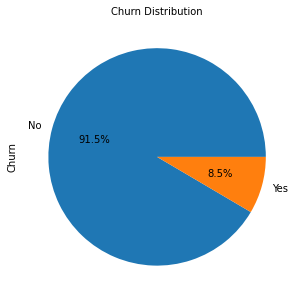

In [55]:
#Churn Distribution
ax = (churn_data_hvc['churn'].value_counts()*100.0 /len(churn_data_hvc)).plot.pie(autopct='%.1f%%', labels=['No','Yes'],figsize=(5,5), fontsize = 10)                                                                           

ax.set_ylabel('Churn',fontsize = 10)
ax.set_title('Churn Distribution', fontsize = 10)

#### Inference
The percentage of churn customers is very low and our model will have a difficult
time with this imbalance we might need to find a way to balance this data

In [56]:
columns_9 = [col for col in churn_data_hvc.columns if 'total' in col]
print(columns_9)


['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8', 'total_amt_6', 'total_amt_7', 'total_amt_8', 'total_vol_data_mb_6', 'total_vol_data_mb_7', 'total_vol_data_mb_8', 'avg_total_mou_67', 'total_mou_8', 'total_t2c_67', 'total_t2c_8', 'total_avg_rech_amt_67']


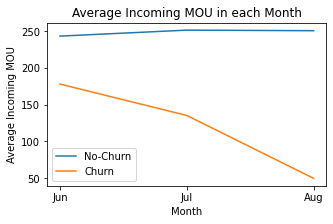

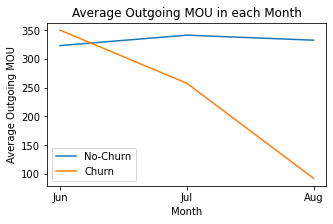

In [57]:
# Compare Average incoming MOU each month with churn
inc_call_list = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
out_call_list = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
chartChurnMou(inc_call_list,'Incoming')
chartChurnMou(out_call_list,'Outgoing')

#### Inference
Avg incomng and outgoing clearly show a downward trend in usage for chrun users

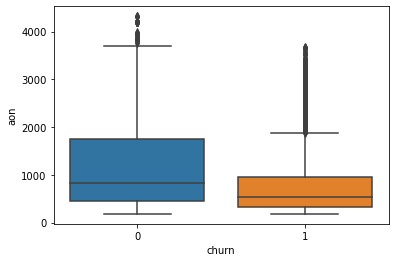

In [58]:
# Churn distribuiton with AON
sns.boxplot(x=churn_data_hvc.churn,y=churn_data_hvc.aon)
plt.show()

#### Inference
As we can see in the above boxplot the average duration of customer who do not churn are likely to stay in the network for longer time. 

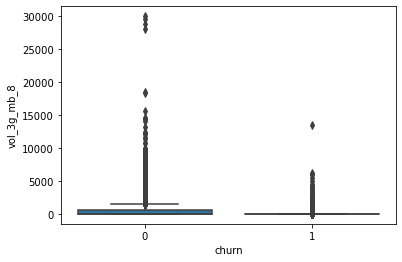

In [59]:
# churn vs data usage in August
sns.boxplot(x=churn_data_hvc.churn,y=churn_data_hvc.vol_3g_mb_8)
plt.show()

#### Inference
The customers who do not churn are seen using more data in August month

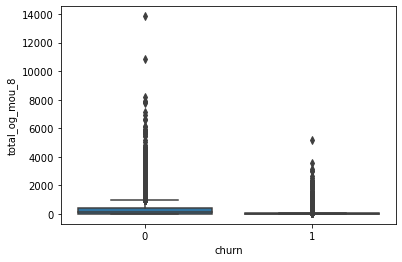

In [60]:
# churn vs outgoing calls in August
sns.boxplot(x=churn_data_hvc.churn,y=churn_data_hvc.total_og_mou_8)
plt.show()

#### Inference
The customers who do not want to churn are seen making more outgoing calls 

<Figure size 2000x800 with 0 Axes>

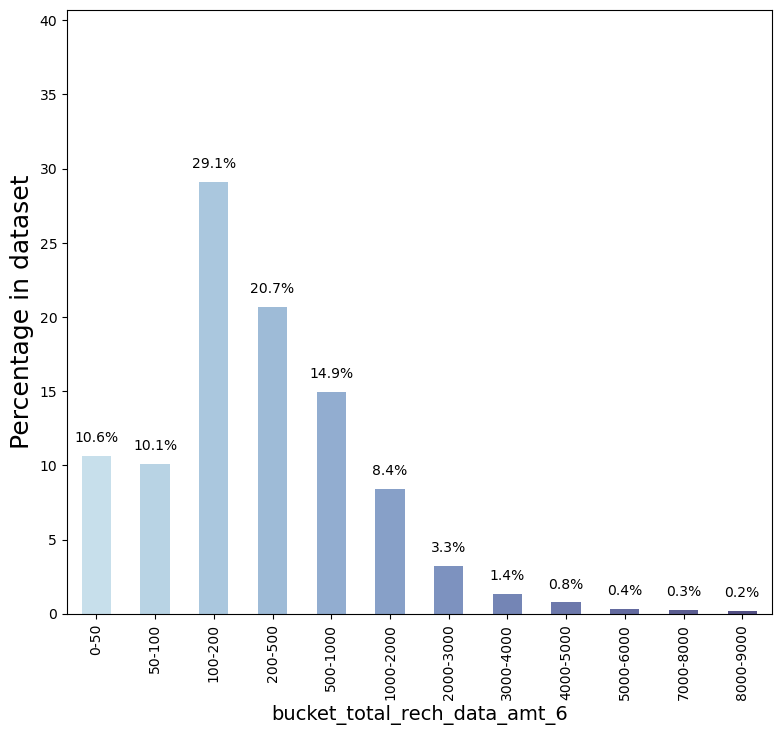

In [61]:
# Lets study the distribution of total Recharge for 6th Month

churn_data_hvc_mou = churn_data_hvc.copy()

# creaate 10 buckets
churn_data_hvc_mou['bucket_total_rech_data_amt_6'] = pd.cut(churn_data_hvc_mou['total_rech_data_amt_6'], [0,50,100,200,500,1000,2000,3000,4000,5000,6000,7000,8000], labels=['0-50','50-100','100-200','200-500','500-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','7000-8000','8000-9000'])

plt.figure(num=None, figsize=(20, 8), dpi=100)
comparePercentage(churn_data_hvc_mou, 'bucket_total_rech_data_amt_6')




<Figure size 2000x800 with 0 Axes>

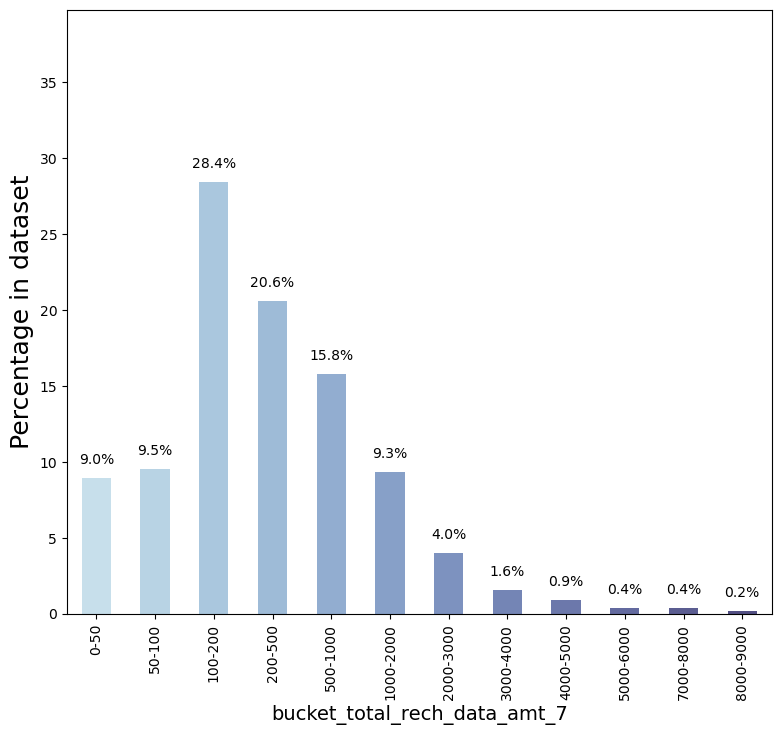

In [62]:
# Lets study the distribution of total Recharge for 7th Month

churn_data_hvc_mou = churn_data_hvc.copy()

# creaate 10 buckets
churn_data_hvc_mou['bucket_total_rech_data_amt_7'] = pd.cut(churn_data_hvc_mou['total_rech_data_amt_7'], [0,50,100,200,500,1000,2000,3000,4000,5000,6000,7000,8000], labels=['0-50','50-100','100-200','200-500','500-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','7000-8000','8000-9000'])

plt.figure(num=None, figsize=(20, 8), dpi=100)
comparePercentage(churn_data_hvc_mou, 'bucket_total_rech_data_amt_7')




<Figure size 2000x800 with 0 Axes>

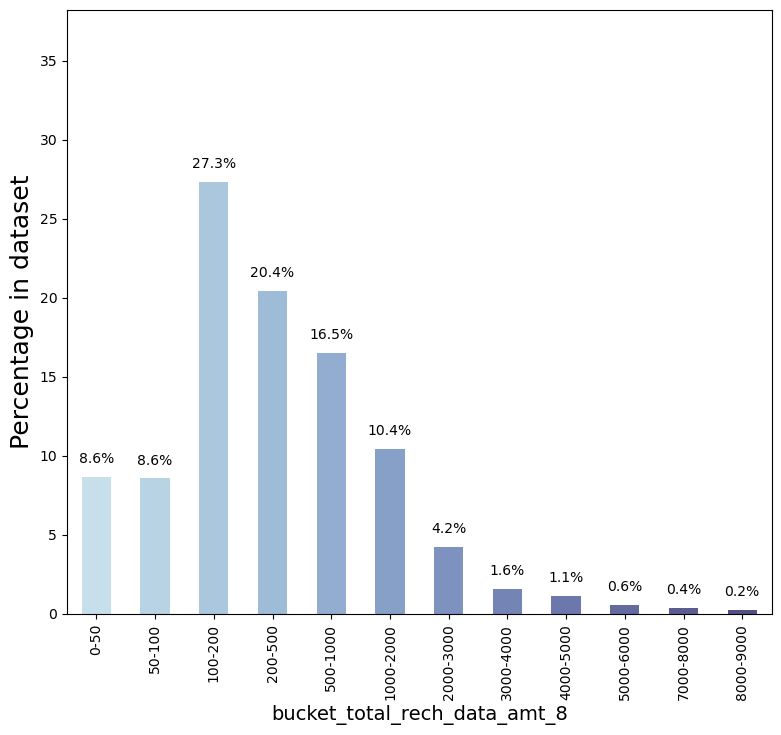

In [63]:
# Lets study the distribution of total Recharge for 8th Month

churn_data_hvc_mou = churn_data_hvc.copy()

# creaate 10 buckets
churn_data_hvc_mou['bucket_total_rech_data_amt_8'] = pd.cut(churn_data_hvc_mou['total_rech_data_amt_8'], [0,50,100,200,500,1000,2000,3000,4000,5000,6000,7000,8000], labels=['0-50','50-100','100-200','200-500','500-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','7000-8000','8000-9000'])

plt.figure(num=None, figsize=(20, 8), dpi=100)
comparePercentage(churn_data_hvc_mou, 'bucket_total_rech_data_amt_8')




#### Inference
The distribution of data does not follow any seasonality between the months. This is a good thing so we don't need to factor this in

<Figure size 2000x800 with 0 Axes>

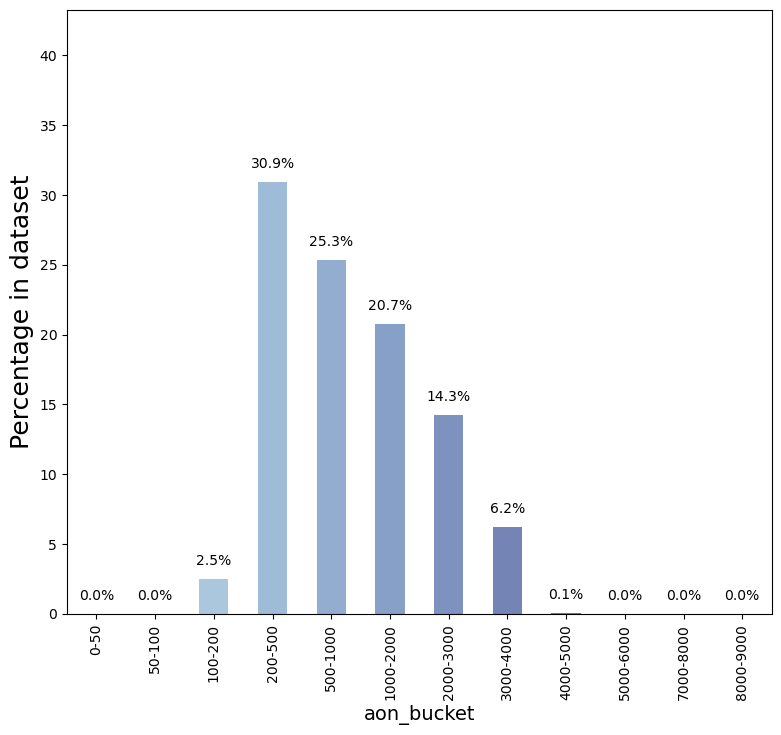

In [64]:
# Lets study the distribution of AON

churn_data_hvc_mou = churn_data_hvc.copy()

# creaate 10 buckets
churn_data_hvc_mou['aon_bucket'] = pd.cut(churn_data_hvc_mou['aon'], [0,50,100,200,500,1000,2000,3000,4000,5000,6000,7000,8000], labels=['0-50','50-100','100-200','200-500','500-1000','1000-2000','2000-3000','3000-4000','4000-5000','5000-6000','7000-8000','8000-9000'])

plt.figure(num=None, figsize=(20, 8), dpi=100)
comparePercentage(churn_data_hvc_mou, 'aon_bucket')


#### Inference
Most of the users have been with the network since 1 to 6 years

In [65]:
# Now that visuliazation is done we can drop the features as we have captured them in our derviced metrics
churn_data_hvc = churn_data_hvc.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8',
                                       'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                                       'total_og_mou_6','total_og_mou_7','total_og_mou_8',
                                       'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                                       'loc_og_mou_6','loc_og_mou_7','loc_og_mou_8',
                                       'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
                                       'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'],axis=1)



------------------

## Checkpoint 4: Data preparation

- scale
- Create dummy variables if needed
- Oversampling of data since the data is skewed


In [66]:
# take a copy of dataframe for model building
churn_df = churn_data_hvc.copy()

In [67]:
churn_df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,...,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_amt_6,total_amt_7,total_amt_8,churn,total_vol_data_mb_6,total_vol_data_mb_7,total_vol_data_mb_8,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8,percentage_change_data_mb_8,avg_total_mou_67,total_mou_8,percentage_mou_8,total_t2c_67,total_t2c_8,percentage_t2c_8,total_avg_rech_amt_67,percentage_change_rech_8
0,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.0,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,0.00,NaN,NaN,0.00,NaN,...,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,1,113,152,115,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,1.0,0.864662,0.0,17,17.000000,0.0,0,0.0,307.0,0.818182
1,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,1.61,29.91,29.23,17.48,65.38,375.58,0.0,8.93,3.61,0.0,0.00,2.35,5.90,0.00,12.49,0.0,...,2.0,NaN,154.0,25.0,NaN,1.0,2.0,NaN,0.0,0.0,NaN,154.0,50.0,NaN,0.00,0.00,NaN,28.61,7.60,NaN,0.0,0.0,0,1,0,0,0,2,0,0,0,0,0,0,NaN,1.0,1.0,1006,0.00,0.00,0.00,0.00,NaN,154.0,100.0,NaN,538.0,383.0,0,0,108,365,1.448437,1.696569,0.736400,1.761573,1.430296,0.731602,1.0,1.0,1.0,6.697248,610.5,2496,4.081766,1.0,0,0.0,229.0,1.230435
4,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,0.0,0.0,0.0,50.31,149.44,83.89,67.64,91.88,124.26,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,9.31,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,9.31,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,105.68,88.49,233.81,106.84,109.54,104.13,1.5,0.00,0.00,0.0,0.00,0.86,1.93,0.25,0.00,0.0,...,NaN,56.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,56.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0

#### When we ran SMOTE at frist we faced issues with null values and datetime values. We decided to impute or delete the null columns based on a few factors. As for the datetime we decided to drop them. Our assumption is that the imbalance is a bigger issue hence we have done this.

In [68]:
# check null values
checkNullValues(churn_df,0)

total_amt_8                 32.0
total_rech_data_8           32.0
arpu_2g_8                   32.0
arpu_3g_8                   32.0
fb_user_8                   32.0
av_rech_amt_data_8          32.0
count_rech_3g_8             32.0
total_rech_data_amt_8       32.0
count_rech_2g_8             32.0
max_rech_data_8             32.0
night_pck_user_8            32.0
date_of_last_rech_data_8    32.0
total_rech_data_6           20.0
count_rech_3g_6             20.0
night_pck_user_6            20.0
arpu_2g_6                   20.0
fb_user_6                   20.0
arpu_3g_6                   20.0
av_rech_amt_data_6          20.0
total_amt_6                 20.0
total_rech_data_amt_6       20.0
count_rech_2g_6             20.0
date_of_last_rech_data_6    20.0
max_rech_data_6             20.0
fb_user_7                   19.0
night_pck_user_7            19.0
arpu_2g_7                   19.0
max_rech_data_7             19.0
arpu_3g_7                   19.0
date_of_last_rech_data_7    19.0
count_rech

In [69]:
# dropping columns which have more than 30% of missing values
churn_df = churn_df.loc[:, churn_df.isnull().mean() < .3]

In [70]:
# create corr matrix
df_corr_matrix = churn_df.corr().abs()

# Select top features from correlation matrix
top_feat = df_corr_matrix.where(np.triu(np.ones(df_corr_matrix.shape), k=1).astype(np.bool))

# select one feature from a set with correlation greater than 0.8
drop_feat = [column for column in top_feat.columns if any(top_feat[column] > 0.8)]

# drop features from dataframe 
churn_df.drop(drop_feat, axis=1, inplace=True)

We created a correlation matrix and dropped one of each column. We are doing this to reduce the number of features

In [71]:
# checking to see the number of columns
churn_df.shape

(30000, 127)

In [72]:
# checking to see null values as SMOTE won't work with columsn with null values
checkNullValues(churn_df,0)

max_rech_data_6             20.0
date_of_last_rech_data_6    20.0
night_pck_user_6            20.0
fb_user_6                   20.0
av_rech_amt_data_6          20.0
count_rech_3g_6             20.0
total_rech_data_amt_6       20.0
total_rech_data_6           20.0
max_rech_data_7             19.0
total_rech_data_7           19.0
arpu_3g_7                   19.0
fb_user_7                   19.0
av_rech_amt_data_7          19.0
count_rech_3g_7             19.0
total_rech_data_amt_7       19.0
night_pck_user_7            19.0
date_of_last_rech_data_7    19.0
std_og_t2f_mou_8             6.0
spl_ic_mou_8                 6.0
og_others_8                  6.0
std_ic_t2o_mou_8             6.0
std_ic_t2f_mou_8             6.0
isd_ic_mou_8                 6.0
std_og_mou_8                 6.0
std_ic_t2m_mou_8             6.0
spl_og_mou_8                 6.0
std_ic_t2t_mou_8             6.0
ic_others_8                  6.0
loc_ic_t2f_mou_8             6.0
roam_og_mou_8                6.0
loc_og_t2f

In [73]:
# impute na values with 0 for the rest of the data types
list_of_columns_impute_temp = checkNullValues(churn_df,0)

# get it as a list
list_of_columns_impute = list_of_columns_impute_temp.index.values
list_of_columns_impute
# now we are going to impute
for columnName in list_of_columns_impute:
    churn_df[columnName].fillna(0,inplace=True)





In [74]:
# Deleting the date columns as SMOTE does not work with the date columns
columns_date = [col for col in churn_df.columns if 'date' in col]

# lets del date columns and see if the imbalance if fixed
churn_df = churn_df.drop(columns_date,axis=1)


In [75]:
# checking the count of columns
churn_df.shape

(30000, 119)

In [76]:
# Split the dataframe into X & y
X = churn_df.drop(['churn'], axis=1)
y = churn_df['churn']

churn_df.drop('churn', axis=1, inplace=True)


In [77]:
# Split X,y into train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [78]:
X_train.shape, X_test.shape

((21000, 118), (9000, 118))

### Scaling dataset

In [79]:
# we are using MinMaxScaler 
scaler = MinMaxScaler()

list_of_columns = X_train.columns
X_train[list_of_columns] = scaler.fit_transform(X_train[list_of_columns])
X_test[list_of_columns] = scaler.transform(X_test[list_of_columns])

X_train

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,arpu_3g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_6,fb_user_7,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_vol_data_mb_6,total_vol_data_mb_7,total_vol_data_mb_8,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8,loc_og_to_ic_mou_6,loc_og_to_ic_mou_7,loc_og_to_ic_mou_8,percentage_change_data_mb_8,avg_total_mou_67,total_mou_8,percentage_mou_8,percentage_t2c_8,percentage_change_rech_8
16180,0.0,0.0,0.0,0.046737,0.062544,0.041965,0.032680,0.036829,0.036744,0.021158,0.006620,0.012731,0.113441,0.119172,0.005799,0.004546,0.020544,0.017336,0.022610,0.028160,0.000000,0.125376,0.000000,0.000000,0.025769,0.013388,0.000000,0.003650,0.0,0.0,0.0,0.0,0.015042,0.000000,0.000056,0.060336,0.005492,0.000000,0.000000,0.0,0.0,0.010531,0.035396,0.019899,0.014484,0.005593,0.000000,0.036984,0.014848,0.000000,0.004900,0.009989,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.052092,0.039118,0.000000,0.000856,0.007975,0.000000,0.129310,0.094203,0.047244,0.028667,0.041290,0.045468,0.030952,0.060952,0.045468,0.016393,0.000000,0.026367,0.000000,0.034483,0.000000,0.006926,0.000000,0.005201,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00000,1.0,0.0,0.607341,0.000000,0.000000,0.002556,0.001143,0.001097,0.000000,0.006975,0.000000,0.000000,0.000512,0.000858,0.000000,0.000712,0.002086,0.000000,0.000000,0.089130,0.046250,0.000247,0.000000,0.000857
15664,0.0,0.0,0.0,0.083510,0.089129,0.071804,0.039749,0.040946,0.061816,0.036915,0.027409,0.000000,0.000000,0.000000,0.053047,0.044304,0.089526,0.078250,0.021187,0.014951,0.010318,0.000000,0.000000,0.010175,0.000259,0.000755,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000856,0.001729,0.000000,0.003085,0.000675,0.007156,0.000000,0.0,0.0,0.033788,0.051140,0.077900,0.031423,0.012763,0.042605,0.000280,0.000993,0.000964,0.000622,0.002207,0.006693,0.000000,0.000499,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001622,0.000729,0.010076,0.137931,0.079710,0.062992,0.084000,0.081290,0.076387,0.057143,0.060952,0.076387,0.049180,0.037037,0.162058,0.162058,0.103448,0.058824,0.092061,0.115464,0.096664,0.0,0.0,0.00,0.0,0.0,0.000000,0.2,0.00000,1.0,1.0,0.451823,0.076786,0.213116,0.163127,0.048573,0.043760,0.018301,0.045304,0.066526,0.037355,0.000945,0.001438,0.000316,0.001846,0.002562,0.000936,0.000057,0.118142,0.091925,0.000370,0.038961,0.001059
28095,0.0,0.0,0.0,0.035811,0.035467,0.033064,0.000819,0.000222,0.020339,0.002518,0.005982,0.000000,0.000000,0.000000,0.001101,0.000245,0.025962,0.005461,0.000000,0.000000,0.010263,0.003448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.

In [80]:
# from sklearn.preprocessing import StandardScaler
# Scaler_X = StandardScaler()
# X_train = Scaler_X.fit_transform(X_train)
# X_test = Scaler_X.transform(X_test)

In [81]:
# making sure we have no null values 
checkNullValues(churn_df,0)

Series([], dtype: float64)

### Handling imabalance in the dataset

#### Using SMOTE to balance the dataset

In [82]:
# as per our analysis in EDA and project requirement we need to handle the imbalance
# We have chosen SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE(random_state=42)
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 19188, 1: 1812})
After Counter({1: 19188, 0: 19188})


-----------

## Checkpoint 5: Model building and evaluation

- Base Model building using the basic data no fix of imbalance or use of any pca or hyperparameter
- Logistic with SMOTE data
- USE PCA in logistic
- Then hyper parameters on tree
- measure accuracy, precission and a few other parameters


#### As per the business guidelines we need to concentrate on identifying churn users. So we will concentrate on precision as the metric

### 1) Base Model building using the basic data no fix of imbalance or use of any pca or hyperparameter


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score

# logistic regression on raw dataset
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print_score("Logistic Regression",y_test,y_pred)
store_score(lr, X_test, y_test, 'Logistic Regression', 'actual')

Accuracy score using Logistic Regression: 
92.01


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8271
           1       0.58      0.05      0.09       729

    accuracy                           0.92      9000
   macro avg       0.75      0.52      0.52      9000
weighted avg       0.89      0.92      0.89      9000

[[8245   26]
 [ 693   36]]


<!-- #### Inference
0.58 precision for churn is low -->

In [84]:
from sklearn import svm

# SVM model
svc = svm.SVC(kernel='rbf',probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

print_score("SVM",y_test,y_pred)
store_score(svc, X_test, y_test, 'SVM', 'actual')

Accuracy score using SVM: 
91.91


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8271
           1       1.00      0.00      0.00       729

    accuracy                           0.92      9000
   macro avg       0.96      0.50      0.48      9000
weighted avg       0.93      0.92      0.88      9000

[[8271    0]
 [ 728    1]]


<!-- #### Inference
This did really bad at 0 -->

In [85]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5, min_samples_leaf=7)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print_score("Decision Tree",y_test,y_pred)
store_score(dt, X_test, y_test, 'Decision Tree', 'actual')

Accuracy score using Decision Tree: 
94.68


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8271
           1       0.76      0.51      0.61       729

    accuracy                           0.95      9000
   macro avg       0.86      0.75      0.79      9000
weighted avg       0.94      0.95      0.94      9000

[[8151  120]
 [ 359  370]]


#### Inference
at 0.76 the decision tree did the best among base models

### 2) Logistic with SMOTE data

In [86]:
# Try basic logistic with  SMOTE data
lr_sm = LogisticRegression()
lr_sm.fit(X_train_sm,y_train_sm)
y_pred = lr_sm.predict(X_test)

print_score("Logistic Regression on SMOTE",y_test,y_pred)

Accuracy score using Logistic Regression on SMOTE: 
79.72


              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8271
           1       0.26      0.80      0.39       729

    accuracy                           0.80      9000
   macro avg       0.62      0.80      0.63      9000
weighted avg       0.92      0.80      0.84      9000

[[6590 1681]
 [ 144  585]]


### 3) USE PCA in logistic


In [87]:
# initiating the pca object
pca = PCA(random_state=42)

In [88]:
# fitting the pca base
pca.fit(X_train_sm)

PCA(random_state=42)

In [89]:
# checking to see if we have values
pca.components_

array([[ 5.45415119e-19, -5.55111512e-16,  2.22044605e-16, ...,
        -1.73038364e-04, -2.21781876e-03, -8.63564897e-04],
       [-3.28838359e-19,  2.22044605e-16,  1.38777878e-16, ...,
         4.70586912e-05,  1.89534074e-03, -1.92368863e-04],
       [ 1.92155266e-18, -3.88578059e-16,  3.33066907e-16, ...,
        -2.23576841e-04,  5.30765156e-03,  2.15607885e-04],
       ...,
       [-0.00000000e+00,  9.31989217e-03, -1.62891660e-02, ...,
         8.25094794e-17, -4.43980790e-17, -8.80236639e-17],
       [ 9.99996035e-01, -2.58429070e-03,  1.11080001e-03, ...,
        -1.87046051e-18, -4.02510057e-18, -8.63126573e-19],
       [-0.00000000e+00,  3.95514937e-01,  9.17978791e-01, ...,
         3.28513258e-17, -1.21430643e-17, -4.51028104e-17]])

In [90]:
# checking to see the variance
pca.explained_variance_ratio_

array([3.69401105e-01, 3.24922369e-01, 6.96688705e-02, 3.69280439e-02,
       2.70007614e-02, 2.44281434e-02, 2.12708597e-02, 1.62276454e-02,
       1.06912432e-02, 9.04618710e-03, 6.62450979e-03, 5.77609746e-03,
       5.34315304e-03, 5.06998668e-03, 4.34628941e-03, 4.22545711e-03,
       3.50216160e-03, 3.20720833e-03, 2.97305729e-03, 2.77534454e-03,
       2.53521334e-03, 2.39372032e-03, 2.28715359e-03, 1.99076824e-03,
       1.90581828e-03, 1.82303366e-03, 1.79525857e-03, 1.68232065e-03,
       1.60954872e-03, 1.55568157e-03, 1.37387525e-03, 1.26320494e-03,
       1.22241334e-03, 1.15520951e-03, 1.04014175e-03, 9.07387844e-04,
       8.75522905e-04, 8.03952956e-04, 7.93078977e-04, 7.73571127e-04,
       7.59478872e-04, 7.30260792e-04, 7.19144127e-04, 6.86806698e-04,
       6.55570589e-04, 6.10777958e-04, 5.72606302e-04, 5.59178365e-04,
       5.49604320e-04, 5.37766389e-04, 5.31869723e-04, 5.02230834e-04,
       4.64429131e-04, 4.30991703e-04, 4.18284244e-04, 4.02430526e-04,
      

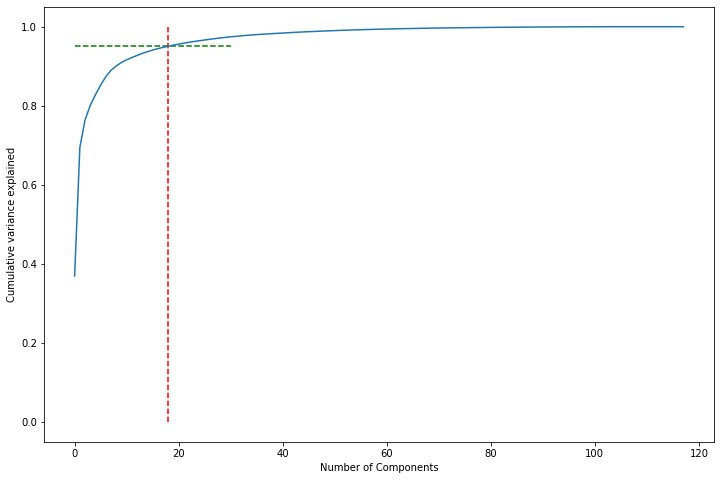

In [91]:
# check the variance visually
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=18, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("Number of Components")
plt.show()

In [92]:
# perform  PCA for 18 components based on the above graph
pca_final = IncrementalPCA(n_components=18)

# crate a new dataframe with PCA 
X_train_sm_pca = pca_final.fit_transform(X_train_sm)
X_train_sm_pca.shape

(38376, 18)

<AxesSubplot:>

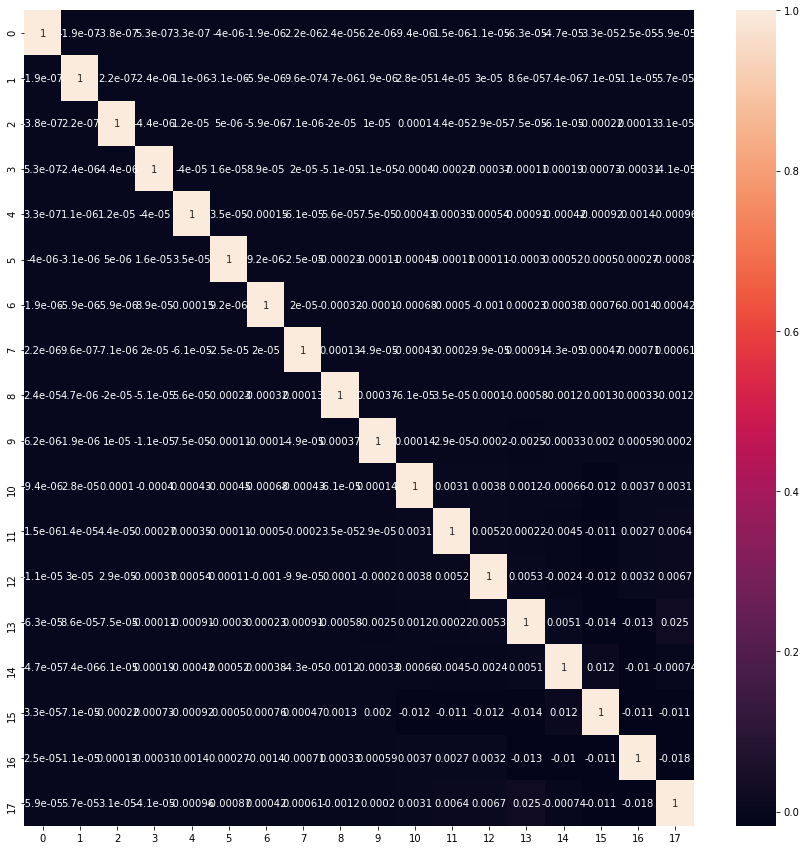

In [93]:
# lets review the correlation
corrmat = np.corrcoef(X_train_sm_pca.transpose())
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [94]:
# Now we can apply on the test set too
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9000, 18)

In [95]:
# logistic regression on PCA data
lr_pca = LogisticRegression()
lr_pca.fit(X_train_sm_pca, y_train_sm)
y_pred = lr_pca.predict(X_test_pca)

print_score("Logistic Regression on PCA",y_test,y_pred)
store_score(lr_pca, X_test_pca, y_test, 'Logistic Regression', 'smote')

Accuracy score using Logistic Regression on PCA: 
76.3


              precision    recall  f1-score   support

           0       0.98      0.76      0.85      8271
           1       0.23      0.80      0.35       729

    accuracy                           0.76      9000
   macro avg       0.60      0.78      0.60      9000
weighted avg       0.92      0.76      0.81      9000

[[6281 1990]
 [ 143  586]]


### 4) USE PCA with Decision Trees


In [96]:
dt_pca = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5, min_samples_leaf=7)
dt.fit(X_train_sm_pca,y_train_sm)
y_pred_dt = dt.predict(X_test_pca)

print_score("Decision Tree on PCA",y_test,y_pred_dt)

Accuracy score using Decision Tree on PCA: 
68.81


              precision    recall  f1-score   support

           0       0.97      0.68      0.80      8271
           1       0.17      0.74      0.28       729

    accuracy                           0.69      9000
   macro avg       0.57      0.71      0.54      9000
weighted avg       0.90      0.69      0.76      9000

[[5654 2617]
 [ 190  539]]


In [110]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(learning_rate =0.05, n_estimators=1000, max_depth=8, min_child_weight=6)
xgbc.fit(X_train,y_train)

[21:04:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
y_pred_xgb = xgbc.predict(X_test)

print_score("XGBoost",y_test,y_pred_xgb)
store_score(xgbc, X_test, y_pred_xgb, 'XGBoost', 'actual')

Accuracy score using XGBoost: 
94.7


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8271
           1       0.73      0.55      0.63       729

    accuracy                           0.95      9000
   macro avg       0.84      0.77      0.80      9000
weighted avg       0.94      0.95      0.94      9000

[[8121  150]
 [ 327  402]]


In [112]:
class_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [115]:
class_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,XGBoost,actual,1.0,1.0,1.0,1.0


#### Hyperparameter Tuning on the models

In [ ]:
'''
%%time
# GridSearchCV to find out best params for Decision Tree
n_folds = 5

# parameters to build the model on
params = {'max_depth': range(1, 40),
             'criterion':['gini','entropy']}

# instantiate the model
dt = DecisionTreeClassifier(random_state = 42)

# fit tree on training data
dt_gs = GridSearchCV(dt, param_grid=params, 
                    cv=n_folds, 
                   scoring="accuracy",n_jobs=-1,verbose=1)
dt_gs.fit(X_train_sm_pca,y_train_sm)
'''

In [ ]:
 # dt_gs.cv_results_

In [ ]:
# print(dt_gs.best_estimator_)
# print(dt_gs.best_score_)

According to the above hyperparameters the decision tree performs well when max_depth=24 & the criterion is entropy
<b>The score is around 88.02</b>

In [ ]:
# applying the best params for DecisionTree & re-evaluting the model again
dt = DecisionTreeClassifier(criterion='entropy', max_depth=24, random_state=42)
dt.fit(X_train_sm_pca,y_train_sm)

In [ ]:
y_pred = dt.predict(X_test_pca)

In [ ]:
print_score("DT",y_test,y_pred)

In [ ]:
# print most important features in descending order
pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)

The <b>four</b> most important features for churn are <b>loc_og_t2o_mou, offnet_mou_8, roam_og_mou_8, loc_ic_t2o_mou</b>

In [ ]:
'''
%%time
params = {
    'max_depth': [8,10,12],
    'min_samples_leaf': range(100,400,200),
    'min_samples_split': range(200,500,200),
    'n_estimators':[100,200,300],
    'max_features': [12,15,20]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf,param_grid= params,cv=3,n_jobs=-1,verbose=1)

grid_search.fit(X_train_sm_pca,y_train_sm)

print(grid_search.best_score_)
'''

In [ ]:
# print(grid_search.best_params_)

In [ ]:
# applying the best params for RandomForest & re-evaluting the model again
rf = RandomForestClassifier(max_depth=12,
                            max_features=20,
                            min_samples_leaf=100,
                            min_samples_split=200,
                            n_estimators=300,
                            random_state=42)

In [ ]:
rf.fit(X_train_sm_pca,y_train_sm)

## Checkpoint 6: Summary

- Plots for metrics which are important factors
- Recommended Strategies to manage customer churn


In [ ]:
plt.figure(figsize=(15,40))
important_cols = pd.Series(rf.feature_importances_, index=X.columns)
important_cols.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

#### Suggestions for the Network Providers
- The telecom companies should reconsider the outgoing calls tariffs as it is important feature which will impact the churn rate
- The roaming outgoing calls tariffs should be competitive 
- The company should introduce new discounted plans on outgoing calls so that customers stay back in the same network 
- The company can also introduce special packs which gives flat outgoing minutes